# ⭐ خوارزمية جدولة العمليات بالأولوية (Priority Scheduling Algorithm)

هذا البرنامج يقوم بتنفيذ **خوارزمية  جدولة العمليات بالأولوية** . يحسب البرنامج مقاييس الأداء المهمة مثل **وقت الانتظار** ⏱️ ,**وقت التنفيذ الكامل** ⏳، ويعرض ترتيب تنفيذ العمليات باستخدام **مخطط جانت** 📊

---

## ✨ المميزات
- 🛠️ **جدولة العمليات**: يتم جدولة العمليات بناءً على أولويتها (القيم الأقل = أولوية أعلى).
- 📊 **مقاييس الأداء**:
  - حساب **وقت الانتظار** ⏱️ ,**وقت التنفيذ الكامل** ⏳ لكل عملية.
  - حساب المتوسط العام لـ **وقت الانتظار** و**وقت التنفيذ الكامل**.
- 🎨 **عرض مرئي**: يتم تمثيل الجدولة الزمنية للعمليات عبر **مخطط جانت**.

---

## 📝 القيم المطلوبة من المستخدم
- 🔢 **الأولوية (Priority)**: قيمة عددية (رقم أقل = أولوية أعلى).
- ⏲️ **وقت التنفيذ (Burst Time)**: المدة الزمنية اللازمة لتنفيذ العملية.

---

## 📤 النتائج
1. ✅ **ترتيب processes** : عرض ترتيب العمليات حسب الأولوية.
2. 📋 **جدول النتائج** :
   - 🔤 اسم العملية .
   - ⏲️ وقت التنفيذ Burst time .
   - ⏱️ وقت الانتظار Wait time .
   - ⏳ وقت التنفيذ الكامل turnaround time .
3. 🧮 **المتوسطات** :
   -  متوسط وقت الانتظار average waiting time 🕒
   - متوسط وقت التنفيذ الكامل average turnaround time ⏳
4. 📊 **مخطط جانت** :
   - رسم بياني أفقي يوضح الجدول الزمني لتشغيل العمليات





 "⭐ priority scheduling خوارزمية الاولوية ⭐" 
 
 Enter the number of processes: ١

Process P1:
🔢 Enter priority : ١
⏲️ Enter burst time : ١

Process Execution Order based on Priority Scheduling:
+--------------+--------------------+----------------------+-------------------------+
| 🔤 Process   |   ⏲️ Burst Time    |   ⏱️ Waiting Time    |   ⏳ Turnaround Time    |
+==============+====================+======================+=========================+
| P1           |                  1 |                    0 |                       1 |
+--------------+--------------------+----------------------+-------------------------+

🕒 Average Waiting Time: 0.00
⏳ Average Turnaround Time: 1.00


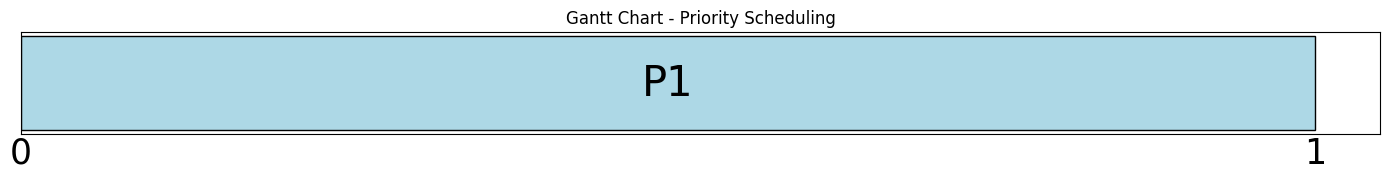

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Priority خورازمية
def priority_scheduling(processes):
    #تنظيم على اساس الاولوية
    processes.sort(key=lambda x: x['priority'])

    print("\nProcess Execution Order based on Priority Scheduling:")
    total_wait_time = 0
    total_turnaround_time = 0
    time_elapsed = 0

    process_table = []  # تخزين البيانات لعرضها على شكل جدول

    process_names = []
    start_times = []
    burst_times = []
    turnaround_times = []

    for process in processes:
        # حساب wait time و turnaround time
        wait_time = time_elapsed
        turnaround_time = wait_time + process['burst_time']

        total_wait_time += wait_time
        total_turnaround_time += turnaround_time

        # توصيل معلومات البروسيس الى الجدول
        process_table.append([process['name'], process['burst_time'], wait_time, turnaround_time])

        # تحديث الوقت بشكل مستمر
        process_names.append(process['name'])
        start_times.append(time_elapsed)
        burst_times.append(process['burst_time'])
        turnaround_times.append(turnaround_time)
        time_elapsed += process['burst_time']

    avg_wait_time = total_wait_time / len(processes)
    avg_turnaround_time = total_turnaround_time / len(processes)

    # عرض المعلومات على شكل جدول
    print(tabulate(process_table, headers=["🔤 Process", "⏲️ Burst Time   ", "⏱️ Waiting Time   ", "⏳ Turnaround Time   "], tablefmt="grid"))
    print(f"\n🕒 Average Waiting Time: {avg_wait_time:.2f}")
    print(f"⏳ Average Turnaround Time: {avg_turnaround_time:.2f}")

    # تصوير البروسيس على شكل Gantt-Chart
    plt.figure(figsize=(14, 2))

    # عرض Gantt-Chart
    for i, process in enumerate(process_names):
        plt.barh(0.4, burst_times[i], left=start_times[i], color='lightblue', edgecolor='black', height=0.8)
        plt.text(start_times[i] + burst_times[i] / 2, 0.4, process, ha='center', va='center', color='black', fontsize=30)
    # عرض معلومات الوقت في الشكل
    for start, burst in zip(start_times, burst_times):
        plt.text(start, -0.2, f"{start}", ha='center', va='center', fontsize=25)
    plt.text(start_times[-1] + burst_times[-1], -0.2, f"{start_times[-1] + burst_times[-1]}", ha='center', va='center', fontsize=25)

    plt.yticks([])
    plt.xticks([])
    plt.title('Gantt Chart - Priority Scheduling')
    plt.tight_layout()
    plt.show()

# Main function
def main():
    processes = []
    num_processes = int(input(" \"⭐ priority scheduling خوارزمية الاولوية ⭐\" \n \n Enter the number of processes: "))

    for i in range(num_processes):
        name = f"P{i + 1}"
        print(f"\nProcess {name}:")
        priority = int(input(f"🔢 Enter priority : "))
        burst_time = int(input(f"⏲️ Enter burst time : "))
        processes.append({'name': name, 'priority': priority, 'burst_time': burst_time})

    priority_scheduling(processes)

if __name__ == "__main__":
    main()
